# VM Monitoring Report

This project will utilize Python to simulate the monitoring of Virtual Machines (VMs) in the cloud tracking key operational metrics like:
- CPU usage
- Memory utilization
- Location/region
- Uptime
- Cost estimates

## Step 1: Generate the data

The following code will be used to generate fake data for the report.

In [2]:
import random
import pandas as pd
from faker import Faker
from datetime import datetime, timedelta

fake = Faker()

# Settings
num_vms = 100
regions = ['East US', 'West Europe', 'Japan East', 'Central India']
statuses = ['Running', 'Stopped']

data = []

for i in range(1, num_vms + 1):
    vm_name = f'VM-{i:03}'
    region = random.choice(regions)
    status = random.choices(statuses, weights=[0.8, 0.2])[0]  # more likely to be Running
    cpu_util = round(random.uniform(5, 95), 2)
    mem_util = round(random.uniform(10, 90), 2)
    uptime_hours = random.randint(0, 744 if status == 'Running' else 0)
    monthly_cost = round((uptime_hours / 744) * random.uniform(50, 500), 2)
    last_patched = fake.date_between(start_date='-90d', end_date='today')
    
    data.append({
        'VM_Name': vm_name,
        'Region': region,
        'Status': status,
        'CPU_Utilization_%': cpu_util,
        'Memory_Utilization_%': mem_util,
        'Uptime_Hours_This_Month': uptime_hours,
        'Monthly_Estimated_Cost_USD': monthly_cost,
        'Last_Patched': last_patched
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Export to CSV
df.to_csv('vm_monitoring_dataset.csv', index=False)

print("Dataset created and saved as vm_monitoring_dataset.csv")


Dataset created and saved as vm_monitoring_dataset.csv


## Step 2: Load and Explore the data (EDA)

Now that the data is generated, it can be loaded, explored, and visualized.

In [7]:
df = pd.read_csv('vm_monitoring_dataset.csv')

# Look at the top and bottom 5 rows of the data
print(df.head())
print(df.tail())

  VM_Name         Region   Status  CPU_Utilization_%  Memory_Utilization_%  \
0  VM-001        East US  Running              21.78                 57.49   
1  VM-002  Central India  Stopped              93.21                 77.36   
2  VM-003    West Europe  Stopped              12.05                 72.89   
3  VM-004    West Europe  Running              74.39                 86.21   
4  VM-005    West Europe  Running              88.39                 15.31   

   Uptime_Hours_This_Month  Monthly_Estimated_Cost_USD Last_Patched  
0                      153                       80.84   2025-04-02  
1                        0                        0.00   2025-04-22  
2                        0                        0.00   2025-02-17  
3                      544                      107.84   2025-03-22  
4                      580                      173.19   2025-03-05  
   VM_Name         Region   Status  CPU_Utilization_%  Memory_Utilization_%  \
95  VM-096  Central India  Runni

In [6]:
# Basic summary

# Total VMs
total_vms = df.shape[0]

# Count by status
status_counts = df['Status'].value_counts()

# Average CPU and Memory utilization
avg_cpu = df['CPU_Utilization_%'].mean()
avg_mem = df['Memory_Utilization_%'].mean()

# Total cost
total_cost = df['Monthly_Estimated_Cost_USD'].sum()

# Printing the values
print(f'Total VMs: {total_vms}')
print(status_counts)
print(f'Avg CPU: {avg_cpu: .2f}% | Avg Mem: {avg_mem: .2f}%')
print(f'Total Monthly Cost: ${total_cost: .2f}')

Total VMs: 100
Running    84
Stopped    16
Name: Status, dtype: int64
Avg CPU:  52.84% | Avg Mem:  50.20%
Total Monthly Cost: $ 12977.59


## Step 3: Visualize the data

It is very useful to visualize data when doing analysis as numbers are mostly meaningless without context.

There are many possible graphs and charts to show with whatever data one is exploring, so care must be taken to keep things understandable to the user.

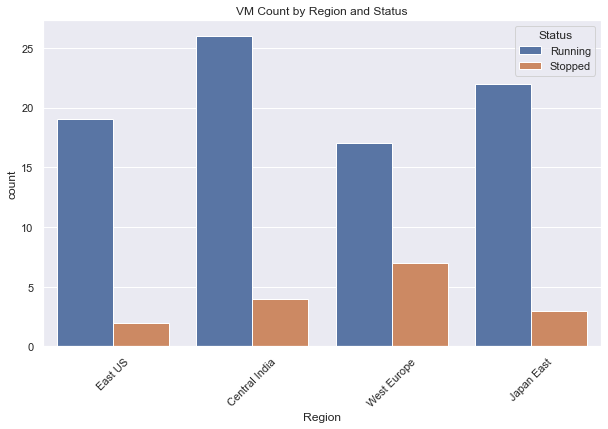

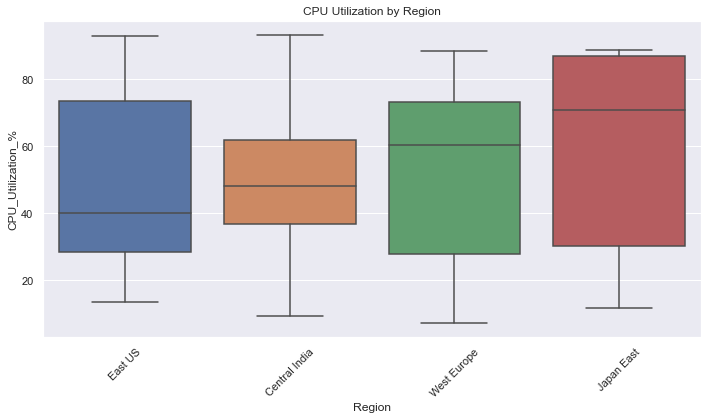

In [8]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme
sns.set(style="darkgrid")

# Bar chart: VMs by Region
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Region', hue='Status')
plt.title('VM Count by Region and Status')
plt.xticks(rotation=45)
plt.show()

# Boxplot: CPU Usage by Region
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Region', y='CPU_Utilization_%')
plt.title('CPU Utilization by Region')
plt.xticks(rotation=45)
plt.tight_layout() # Ensures the plots fit neatly with no overlap
plt.show()

Observing the bar graphs, the West Europe region has the highest number of `Stopped` VMs with all other regions having under five (5) total stopped VMs. Comparing with the boxplot, in West Europe, 50% of the VMs have a CPU Utilization of 60% or over. A simple observation would be that the utilization is the cause of many Vms being down, and that may well be the case, however, the Japan East region shows 50% of the VMs having a CPU utilization of at least 70% and their VMs are mostly running.

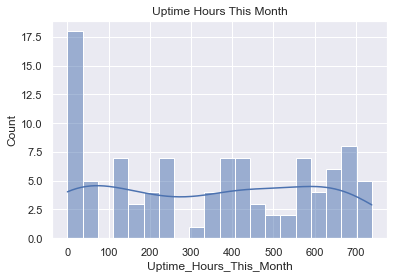

Idle VMs: 16


In [9]:
# Histogram: Distribution of uptime
sns.histplot(df['Uptime_Hours_This_Month'], bins=20, kde=True)
plt.title("Uptime Hours This Month")
plt.show()

# Highlight idle VMs (VMs with low uptime)
idle_vms = df[df['Uptime_Hours_This_Month'] < 10]
print(f"Idle VMs: {len(idle_vms)}")

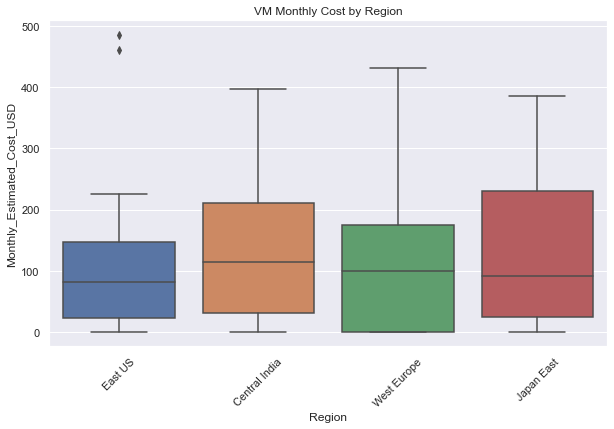

Top Costly VMs:
   VM_Name         Region  Monthly_Estimated_Cost_USD
10  VM-011        East US                      485.59
84  VM-085        East US                      461.26
85  VM-086    West Europe                      431.81
72  VM-073  Central India                      397.08
61  VM-062     Japan East                      385.75
21  VM-022  Central India                      385.50
56  VM-057    West Europe                      366.51
41  VM-042     Japan East                      354.08
46  VM-047  Central India                      342.15
55  VM-056  Central India                      334.04


In [11]:
# Cost by region
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Region', y='Monthly_Estimated_Cost_USD')
plt.title('VM Monthly Cost by Region')
plt.xticks(rotation=45)
plt.show()

# Top 10 costly VMs
top_cost = df.sort_values(by='Monthly_Estimated_Cost_USD', ascending=False).head(10)
print("Top Costly VMs:")
print(top_cost[['VM_Name', 'Region', 'Monthly_Estimated_Cost_USD']])

The Uptime Hours histogram is in keeping with the data from the previous graphs numbers-wise. It would be easy to think that the VMs with the low uptimes are the idle ones, however, it is not accurate to assume that. A VM may have been running for a long time then stopped after being up for a few 100 hours with a high utilization.

In general, the regions all show that 75% of the VMs cost under 250USD. In the East US region, all but two (2) VMs cost under 250USD per month. In three (3) of the four (4) regions, 50% of the VMs cost under 100USD per month, with only Central India breaking the trend.

In [13]:
# Looking at last patched
df['Last_Patched'] = pd.to_datetime(df['Last_Patched'])

# Filter for VMs not patched in the last 30 days
outdated_patch = df[df['Last_Patched']<(pd.Timestamp.today() - pd.Timedelta(days=30))]

print(F"VMs not patched in 30+ days: {outdated_patch.shape[0]}")

VMs not patched in 30+ days: 68


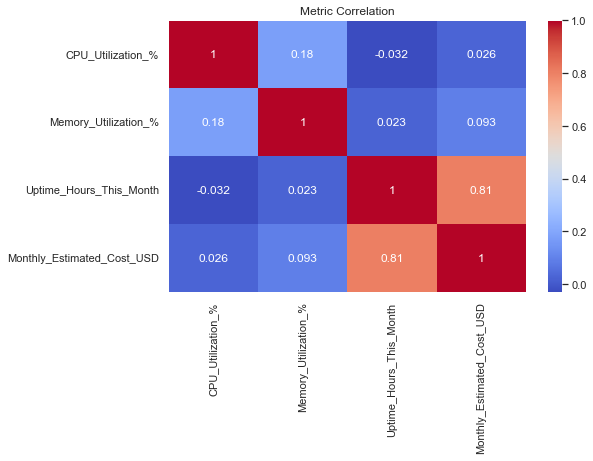

In [14]:
# Correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(df[['CPU_Utilization_%', 'Memory_Utilization_%', 'Uptime_Hours_This_Month', 'Monthly_Estimated_Cost_USD']].corr(), annot=True, cmap='coolwarm')
plt.title("Metric Correlation")
plt.show()


From the heatmap, it is clear that VMs with high uptimes tend to have the higher costs.

Finally, observing which VMs are in a "critical" state (CPU Utilization over 85%)

In [15]:
critical_vms = df[df['CPU_Utilization_%']>85]
print("Critical VMs:")
print(critical_vms[['VM_Name', 'Region', 'CPU_Utilization_%', 'Status']])

Critical VMs:
   VM_Name         Region  CPU_Utilization_%   Status
1   VM-002  Central India              93.21  Stopped
4   VM-005    West Europe              88.39  Running
7   VM-008     Japan East              86.94  Stopped
9   VM-010     Japan East              88.06  Running
14  VM-015     Japan East              88.82  Running
30  VM-031        East US              86.60  Running
57  VM-058     Japan East              88.15  Running
67  VM-068     Japan East              88.15  Running
74  VM-075  Central India              85.09  Stopped
76  VM-077        East US              92.98  Stopped
77  VM-078     Japan East              88.44  Running
79  VM-080  Central India              91.36  Stopped
83  VM-084        East US              93.08  Running
87  VM-088     Japan East              88.80  Running
92  VM-093     Japan East              85.40  Running
97  VM-098  Central India              92.45  Running
99  VM-100    West Europe              87.35  Stopped


## Step 4: Conclusions

Putting it all together:
- VMs with high uptimes tend to have a high cost.
- Central India had the highest number of 'Running' VMs and West Europe had the highest number of `Stopped` VMs.
- 6 of the 16 `Stopped` VMs had a CPU Utilization of over 85%.
- Japan East had the highest CPU Utlization with 50% of the VMs having a utilization of at least 70%.